In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from gensim import corpora, models, similarities, downloader
from sklearn.decomposition import PCA
from matplotlib import pyplot

# text processing with sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, Binarizer


In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             209222 non-null  int64  
 1   blurb                     209214 non-null  object 
 2   converted_pledged_amount  209222 non-null  int64  
 3   country                   209222 non-null  object 
 4   created_at                209222 non-null  object 
 5   currency                  209222 non-null  object 
 6   deadline                  209222 non-null  object 
 7   goal                      209222 non-null  float64
 8   launched_at               209222 non-null  object 
 9   name                      209222 non-null  object 
 10  pledged                   209222 non-null  float64
 11  slug                      209222 non-null  object 
 12  spotlight                 209222 non-null  bool   
 13  staff_pick                209222 non-null  b

In [4]:

df['target'] = df['state'].apply(lambda x: 1 if x == 'successful' else 0).astype('int')

<Axes: title={'center': 'Category Name Distribution'}, ylabel='category_name'>

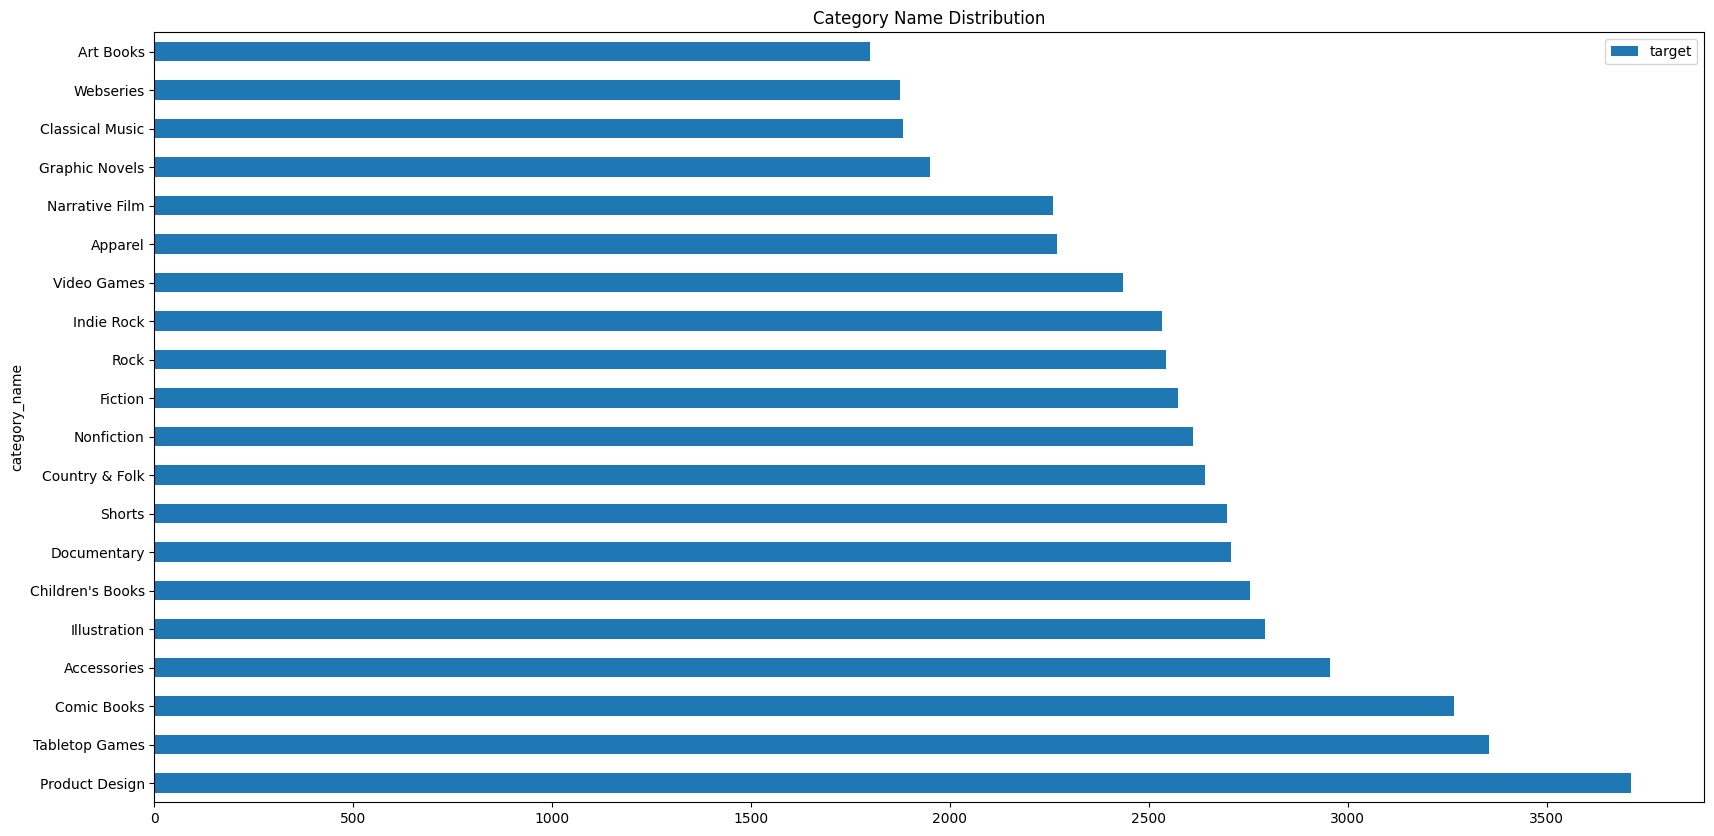

In [5]:
df_category_name = df[['category_name', 'target']]
df_category_name = df_category_name[df_category_name['category_name'].notnull()]
# select with target equal to 1
df_category_name = df_category_name[df_category_name['target'] == 1]

df_category_name = df_category_name.groupby('category_name').agg({'target': 'count'}).reset_index()

df_category_name = df_category_name.sort_values(by='target', ascending=False)

df_category_name.head(20).plot(kind='barh', x='category_name', y='target', figsize=(20, 10), title='Category Name Distribution')

In [6]:
def tokenizer(col):
    corpus = df[col]
    model = CountVectorizer(ngram_range = (2, 5), max_features = 100, token_pattern="[^\W\d_]+", stop_words='english')
    matrix = model.fit_transform(corpus).toarray()
    df_output = pd.DataFrame(data = matrix, columns = model.get_feature_names_out())
    df_output.T.head(10)

    print(df_output.sum().sort_values(ascending=False).head(10))

    return df_output


In [7]:
# df_output_name = tokenizer('name')
# df_output_category = tokenizer('category_name')

# df_output = pd.concat([df_output_name, df_output_category], axis=1)

In [8]:
df['blurb'].fillna('', inplace=True)

In [9]:
def tokenizer_tfdif(col):
    corpus = df[col]
    model = TfidfVectorizer(ngram_range = (1, 7), max_features = 100, token_pattern=r'(?u)\b[A-Za-z]{3,}\b', stop_words='english')
    matrix = model.fit_transform(corpus).toarray()
    df_output = pd.DataFrame(data = matrix, columns = model.get_feature_names_out())

    print(df_output.sum().sort_values(ascending=False).head(10))

    return df_output

In [10]:
df_tokenizer_blurb = tokenizer_tfdif('blurb')
df_tokenizer_name = tokenizer_tfdif('name')
df_tokenizer_category = tokenizer_tfdif('category_name')

df_output = pd.concat([df_tokenizer_blurb, df_tokenizer_name, df_tokenizer_category], axis=1)


new      9417.856137
help     9395.873592
world    6839.718629
book     6501.818706
art      5623.853146
music    5313.507703
album    5163.141605
make     5111.868575
film     4929.884494
life     4816.326587
dtype: float64
canceled    6063.948267
new         5170.054164
album       5078.915180
book        4591.860091
project     4562.829702
art         4133.823559
film        3640.226773
world       3175.584435
music       2656.585111
help        2530.266848
dtype: float64
art            7760.301950
games          5752.041184
music          5160.764047
design         4607.200269
books          4576.534145
web            4570.000000
rock           3935.740097
fiction        3641.000000
accessories    3562.000000
hardware       3201.000000
dtype: float64


In [11]:
df_output.to_csv('data_text_processed.csv', index=False)